In [1]:
# load all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import f1_score
from time import time
import scipy.stats as stats
from scipy.stats import shapiro
import pandas as pd

In [3]:
df = df = pd.read_csv(r"C:\Users\kilss\OneDrive\Portfolio Data\Supermarket Sales\supermarket_sales.csv")

In [5]:
display(df.describe())

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
print("The amout of missing values per row are: \n", df.isnull().sum())

The amout of missing values per row are: 
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [9]:
# Transform the Time variables
df["Date"] = pd.to_datetime(df["Date"])
df["Day_of_Week"] = df["Date"].dt.day_name()

df["Time"] = pd.to_datetime(df["Time"], format="%H:%M").dt.hour

# Categorising the Time variable 
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Midday"
    else:
        return "Evening"

df["Time_Category"] = df["Time"].apply(categorize_time)

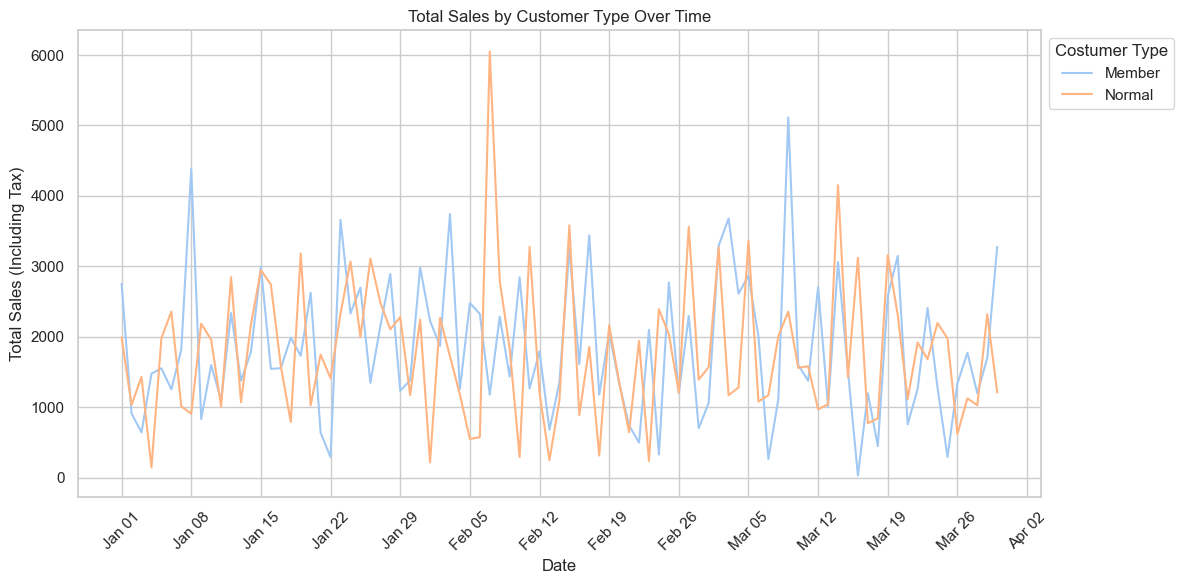

In [13]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="Date",
    y="Total",
    estimator="sum",
    errorbar=None,
    hue="Customer type")
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
plt.title("Total Sales by Customer Type Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (Including Tax)")
plt.legend(title="Costumer Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


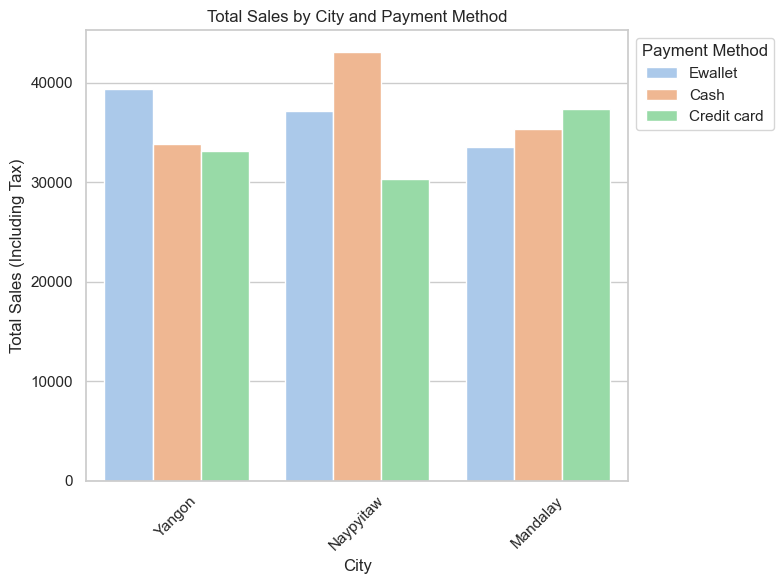

In [15]:
# Sales by Product Line 
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x="City",
    y="Total",
    estimator="sum",
    errorbar=None,
    hue="Payment")
plt.title("Total Sales by City and Payment Method")
plt.xlabel("City")
plt.ylabel("Total Sales (Including Tax)")
plt.xticks(rotation=45)
plt.legend(title="Payment Method", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

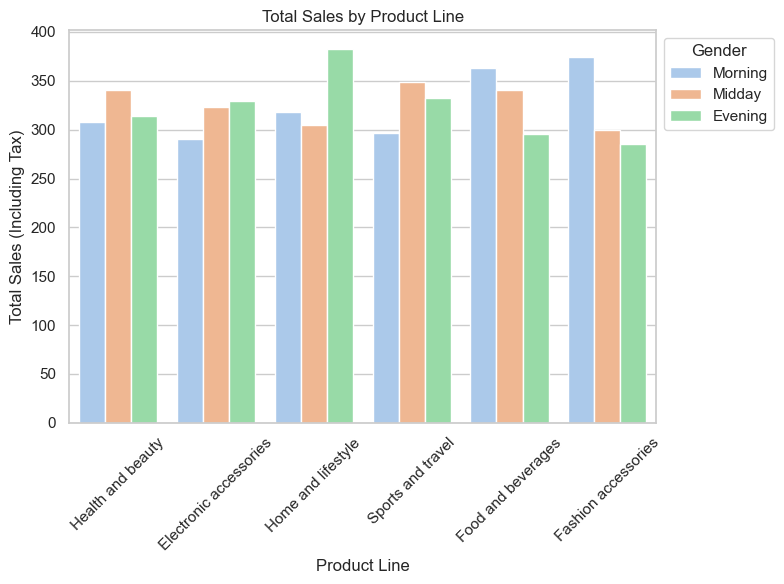

In [17]:
hue_order  = ["Morning", "Midday", "Evening"]

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x="Product line",
    y="Total",
    hue = "Time_Category",
    hue_order=hue_order,
    errorbar = None)
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales (Including Tax)")
plt.xticks(rotation=45)
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [99]:
print(df['Total'].describe())
print(df[df['Total'] < 0])

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating, Day_of_Week, Time_Category]
Index: []


C:\Users\kilss\AppData\Local\Temp\ipykernel_28100\2043031380.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


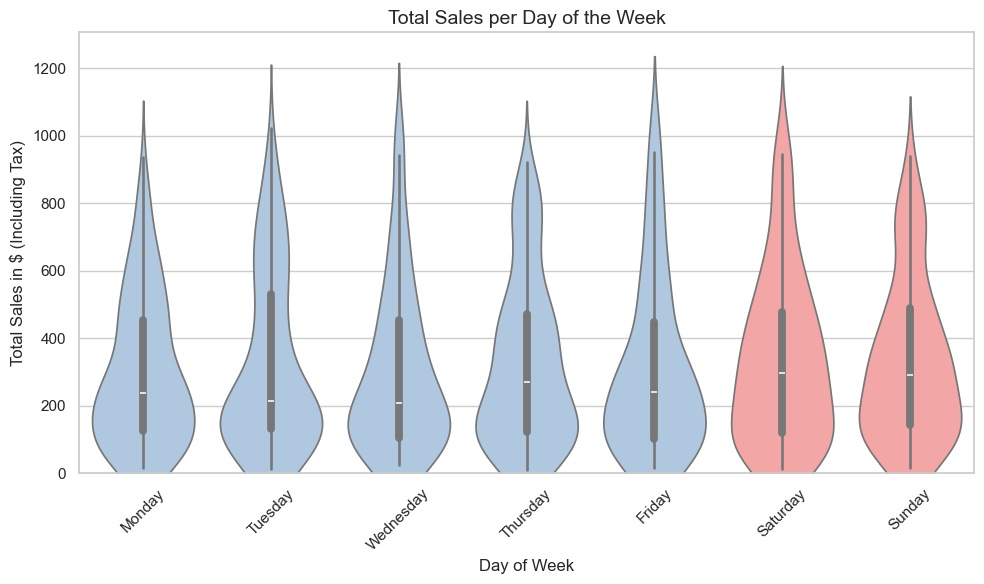

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme and color palette
sns.set_theme(style="whitegrid", palette="pastel")
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
custom_palette = {
    "Monday": "#A7C7E7",
    "Tuesday": "#A7C7E7",
    "Wednesday": "#A7C7E7",
    "Thursday": "#A7C7E7",
    "Friday": "#A7C7E7",
    "Saturday": "#FF9999", 
    "Sunday": "#FF9999"
}

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x="Day_of_Week",
    y="Total",
    order=day_order,
    palette=custom_palette
)

# titles and labels
plt.title("Total Sales per Day of the Week", fontsize=14)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Total Sales in $ (Including Tax)", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

In [21]:
# Define relevant columns
categorical_cols = ["Product line", "Customer type", "Branch", "Payment", "Day_of_Week", "Time_Category"]
df_reg = df[["Unit price", "Quantity", "Total"] + categorical_cols]  

# One-Hot Encoding
ohe = OneHotEncoder(drop="first") 
df_encoded = pd.DataFrame(
    ohe.fit_transform(df_reg[categorical_cols]).toarray(),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=df.index)

# Drop original categorical columns and concatenate with encoded data
df_reg = pd.concat([df_reg.drop(columns=categorical_cols), df_encoded], axis=1)


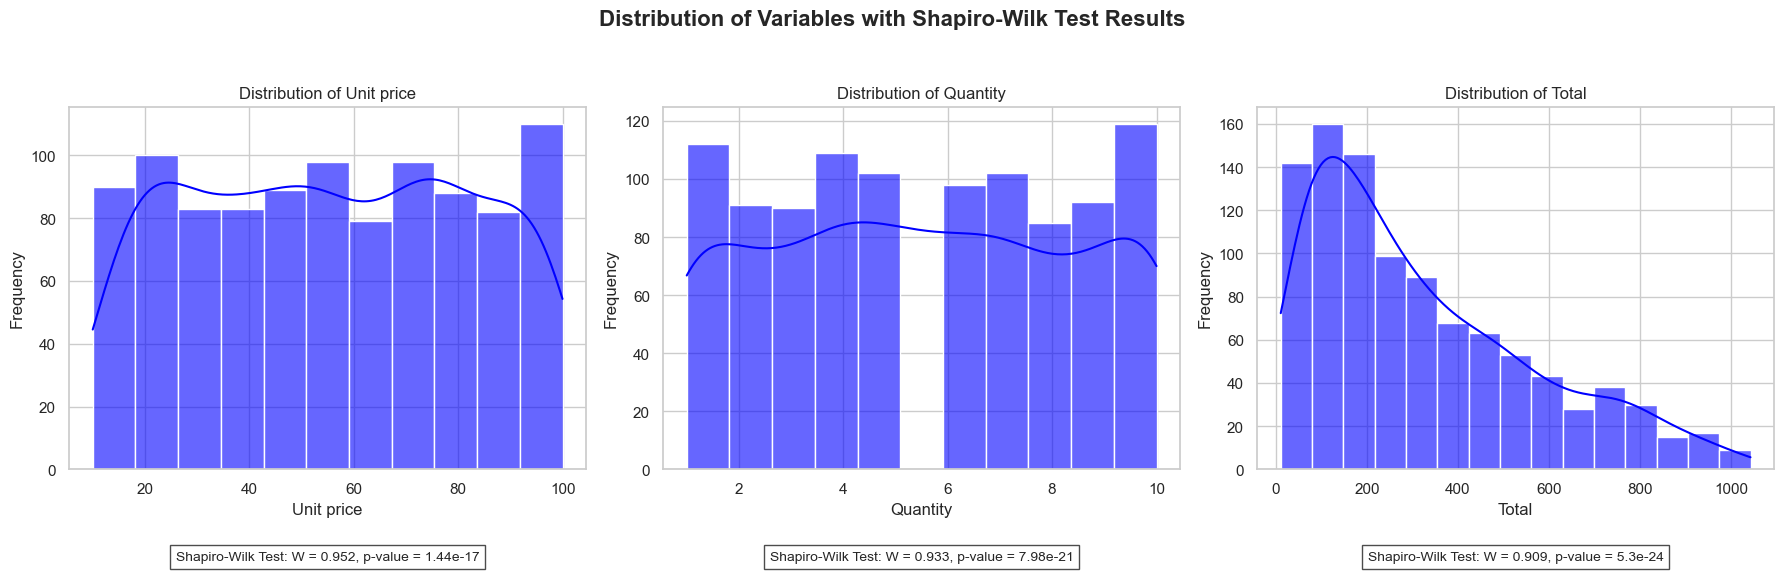

In [23]:
# Function to perform Shapiro-Wilk test
def shapiro_test(data):
    stat, p = shapiro(data)
    return f"Shapiro-Wilk Test: W = {stat:.3f}, p-value = {p:.3g}" if p >= 0 else "Shapiro-Wilk Test: W = {stat:.4f}, p-value < 0.0001"

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
fig.suptitle("Distribution of Variables with Shapiro-Wilk Test Results", fontsize=16, fontweight='bold')

# Variables to plot
variables = ['Unit price', 'Quantity', 'Total']

for i, var in enumerate(variables):
    sns.histplot(df_reg[var], kde=True, ax=axs[i], color='blue', alpha=0.6)
    axs[i].set_title(f"Distribution of {var}")
    axs[i].set_xlabel(var)
    axs[i].set_ylabel("Frequency")
    
    # Perform Shapiro-Wilk test and add text below the plot
    test_result = shapiro_test(df_reg[var])
    axs[i].text(0.5, -0.25, test_result, transform=axs[i].transAxes,
                fontsize=10, ha='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

In [25]:
# Train-Test Split
X = df_reg.drop(columns=["Total"])
y = df_reg["Total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)
# train and Evaluate different models


In [27]:
print(f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"X_test has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")
print(f"y_train has {y_train.shape[0]} rows.")
print(f"y_test has {y_test.shape[0]} rows.")

X_train has 800 rows and 20 columns.
X_test has 200 rows and 20 columns.
y_train has 800 rows.
y_test has 200 rows.


In [29]:
regr = LinearRegression()

In [31]:
# Train the model and time it
time_start = time()
regr.fit(X_train, y_train)
time_end = time()
runtime = time_end - time_start
print(f"Runtime of model training is: {runtime}.")

Runtime of model training is: 0.06218862533569336.


In [33]:
# Print scores
print("Score on train set : " , regr.score(X_train, y_train))
print("Score on test set : ", regr.score(X_test,y_test))

Score on train set :  0.8947420993259745
Score on test set :  0.8799908460405526


In [35]:
# Predic on X_test, instantiate a 'y_pred' object and time the prediction
time_start2 = time()
y_pred = regr.predict(X_test)
time_end2 = time()
runtime2 = time_end2 - time_start2
print(f"Runtime of model training is: {runtime2}.")

Runtime of model training is: 0.0053558349609375.


In [65]:
# Finding the right parameters for the ramdom forrest regressor
param_grid = {
    'n_estimators': [2050,2100,2150],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}


rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2100}


In [79]:
# Instioating the Random forrest regression
from sklearn.metrics import mean_squared_error, r2_score

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

best_params = {
    'max_depth': None,
    'max_features': None,
    'min_samples_leaf': 2,
    'min_samples_split': 2
}
# Model with 2100 trees
model_large = RandomForestRegressor(n_estimators=2100, random_state=42, **best_params)
model_large.fit(X_train_small, y_train_small)
y_pred_large = model_large.predict(X_test_small)

# Model with 1000 trees
model_small = RandomForestRegressor(n_estimators=1000, random_state=42, **best_params)
model_small.fit(X_train_small, y_train_small)
y_pred_small = model_small.predict(X_test_small)

# Evaluation
def evaluate(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

evaluate(y_test_small, y_pred_large, label="Large Model (2100 trees)")
evaluate(y_test_small, y_pred_small, label="Smaller Model (1000 trees)")


Large Model (2100 trees) Performance:
RMSE: 12.7468
R²:   0.9978

Smaller Model (1000 trees) Performance:
RMSE: 12.7393
R²:   0.9978


In [81]:
#Instatiating the Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=None,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)

In [83]:
time_start = time()
rf.fit(X_train, y_train)
time_end = time()
runtime = time_end - time_start
print(f"Runtime of model training is: {runtime}.")

Runtime of model training is: 3.136909008026123.


In [85]:
print("Score on train set : " , rf.score(X_train, y_train))
print("Score on test set : ", rf.score(X_test,y_test))

Score on train set :  0.999748053829459
Score on test set :  0.9988092208151359


In [87]:
y_train_pred_reg = regr.predict(X_train)
residuals_train_reg = y_train - y_train_pred_reg
residuals_test = y_test - y_pred

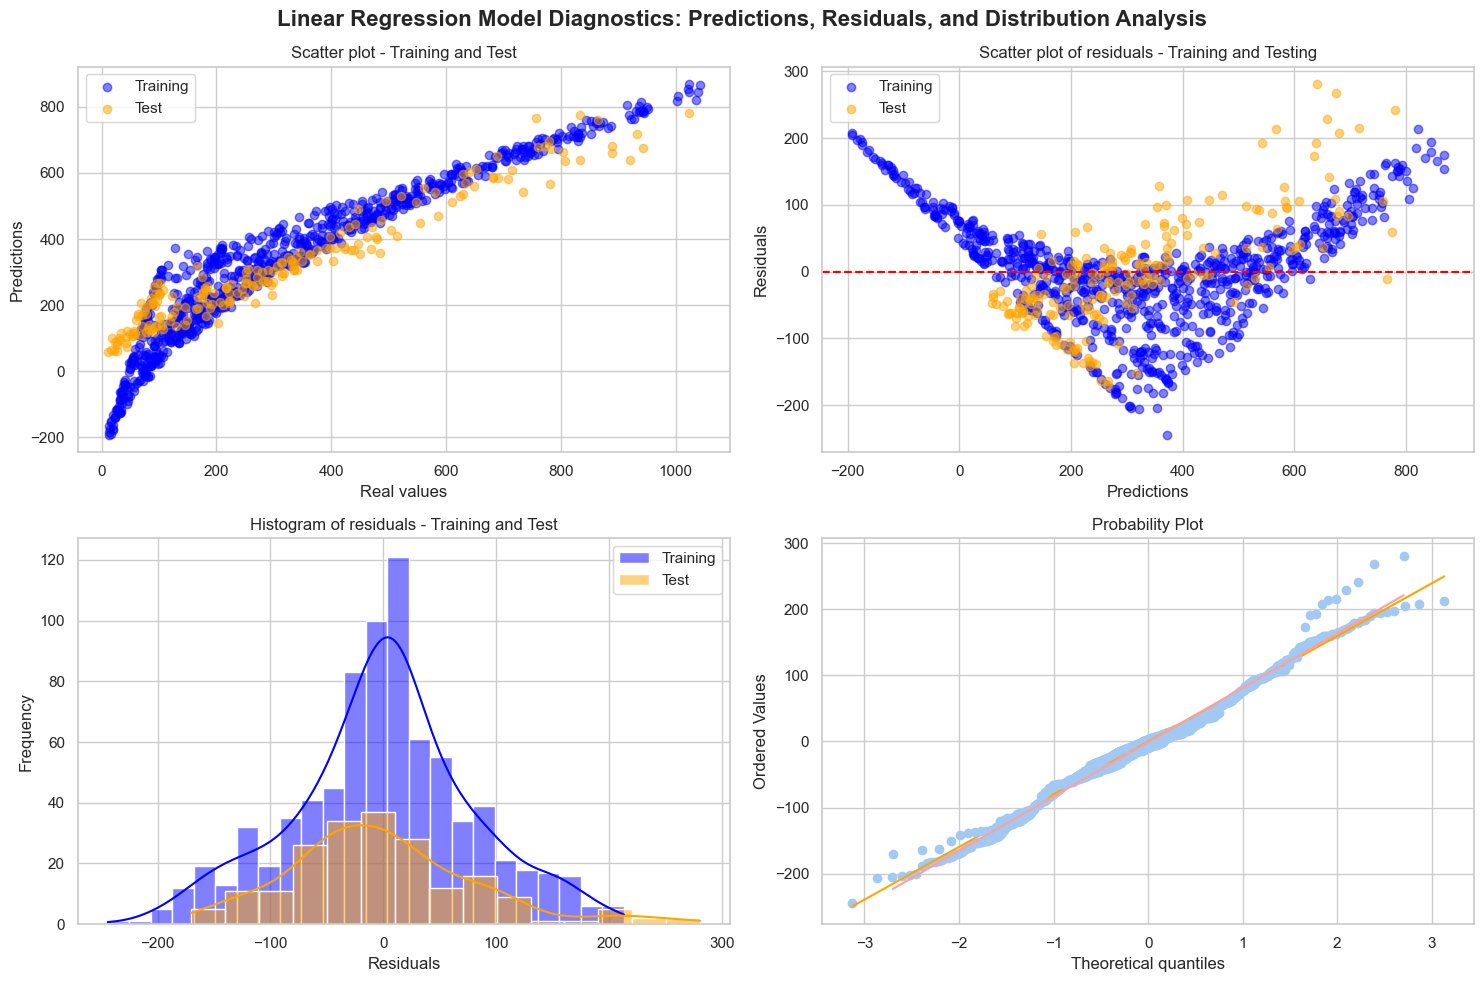

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Linear Regression Model Diagnostics: Predictions, Residuals, and Distribution Analysis", fontsize=16, fontweight='bold')

# Combined scatter plot for training and test set
axs[0, 0].scatter(y_train, y_train_pred_reg, alpha=0.5, label='Training', color='blue')
axs[0, 0].scatter(y_test, y_pred, alpha=0.5, label='Test', color='orange')
axs[0, 0].plot([min(y_train + y_test), max(y_train + y_test)], [min(y_train + y_test), max(y_train + y_test)], color='red')  # Ligne y=x
axs[0, 0].set_xlabel('Real values')
axs[0, 0].set_ylabel('Predictions')
axs[0, 0].set_title('Scatter plot - Training and Test')
axs[0, 0].legend()

# Scatter plot of residuals
axs[0, 1].scatter(y_train_pred_reg, residuals_train_reg, alpha=0.5, label='Training', color='blue')
axs[0, 1].scatter(y_pred, residuals_test, alpha=0.5, label='Test', color='orange')
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_xlabel('Predictions')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].set_title('Scatter plot of residuals - Training and Testing')
axs[0, 1].legend()

# Histogram of residuals
sns.histplot(residuals_train_reg, kde=True, color='blue', label='Training', alpha=0.5, ax=axs[1, 0])
sns.histplot(residuals_test, kde=True, color='orange', label='Test', alpha=0.5, ax=axs[1, 0])
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of residuals - Training and Test')
axs[1, 0].legend()

# QQ-residue plot
stats.probplot(residuals_train_reg, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("QQ-plot des Residuals - Formation")
stats.probplot(residuals_test, dist="norm", plot=axs[1, 1])
axs[1, 1].get_lines()[1].set_color('orange')

plt.tight_layout()
plt.show()

In [95]:
y_train_pred_rf = rf.predict(X_train)
residuals_train_rf = y_train - y_train_pred_rf

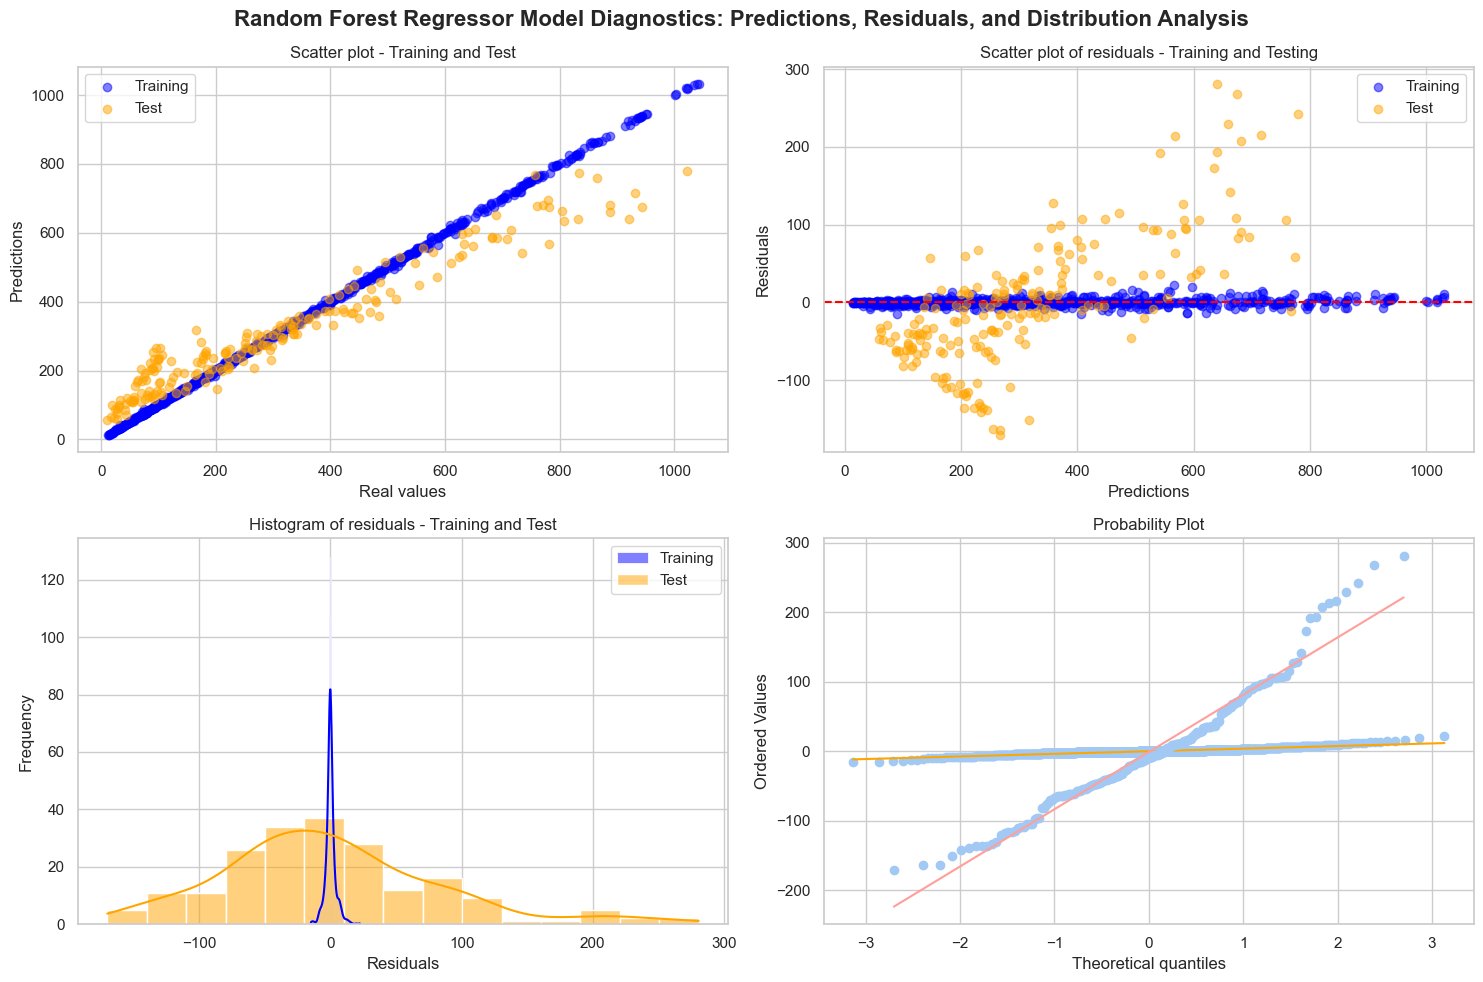

In [97]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Random Forest Regressor Model Diagnostics: Predictions, Residuals, and Distribution Analysis", fontsize=16, fontweight='bold')

# Combined scatter plot for training and test set
axs[0, 0].scatter(y_train, y_train_pred_rf, alpha=0.5, label='Training', color='blue')
axs[0, 0].scatter(y_test, y_pred, alpha=0.5, label='Test', color='orange')
axs[0, 0].plot([min(y_train + y_test), max(y_train + y_test)], [min(y_train + y_test), max(y_train + y_test)], color='red')  # Ligne y=x
axs[0, 0].set_xlabel('Real values')
axs[0, 0].set_ylabel('Predictions')
axs[0, 0].set_title('Scatter plot - Training and Test')
axs[0, 0].legend()

# Scatter plot of residuals
axs[0, 1].scatter(y_train_pred_rf, residuals_train_rf, alpha=0.5, label='Training', color='blue')
axs[0, 1].scatter(y_pred, residuals_test, alpha=0.5, label='Test', color='orange')
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_xlabel('Predictions')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].set_title('Scatter plot of residuals - Training and Testing')
axs[0, 1].legend()

# Histogram of residuals
sns.histplot(residuals_train_rf, kde=True, color='blue', label='Training', alpha=0.5, ax=axs[1, 0])
sns.histplot(residuals_test, kde=True, color='orange', label='Test', alpha=0.5, ax=axs[1, 0])
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of residuals - Training and Test')
axs[1, 0].legend()

# QQ-residue plot
stats.probplot(residuals_train_rf, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("QQ-plot des Residuals - Formation")
stats.probplot(residuals_test, dist="norm", plot=axs[1, 1])
axs[1, 1].get_lines()[1].set_color('orange')

plt.tight_layout()
plt.show()